## Introduction

### ClearSale

ClearSale is a company that goes beyond simple credit card fraud detection to generate trust between company and their good customers to improve total results for their businesses.

#### Problem Statement

Fraud detection refers to the process of monitoring transactions and customer behavior to pinpoint and fight fraudulent activity. It is usually a central part of a firm's loss prevention strategy and sometimes forms a part of its wider anti-money laundering (AML) compliance processes.

Fraud monitoring is a fraud prevention strategy that works by continuously monitoring digital actions to detect fraud, recognize risks, and stop and prevent fraud attacks. It is regularly used by financial institutions to protect both customers and banks alike. 

Using artificial intelligence (AI), fraud monitoring programs can sift through large amounts of data in a short time, learning along the way to recognize threats as they emerge.

In 2020, there were well over 2 million fraud reports made to the Federal Trade Commission (FTC), a number that continues to rise as people shift to an even bigger digital presence. Fraud monitoring can help to minimize the risks and losses related to digital threats (https://www.okta.com/identity-101/fraud-monitoring/).

## Data Preparation and Preprocessing

In [132]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [236]:
df = pd.read_csv("C:/Users/drdav/OneDrive/Desktop/3rd Semester/ADMN5016 - Sujoy/creditcard_2023.csv")

In [237]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [238]:
df.tail()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1
568629,568629,-0.795144,0.433236,-0.649140,0.374732,-0.244976,-0.603493,-0.347613,-0.340814,0.253971,...,0.534853,-0.291514,0.157303,0.931030,-0.349423,-1.090974,-1.575113,0.722936,21493.92,1


In [239]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [240]:
df.shape

(568630, 31)

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

### Data Cleaning

#### Handling missing Data

In [241]:
df.isna().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Exploratory Data Analysis

#### Visualizing Data

In [193]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [28]:
print(df)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

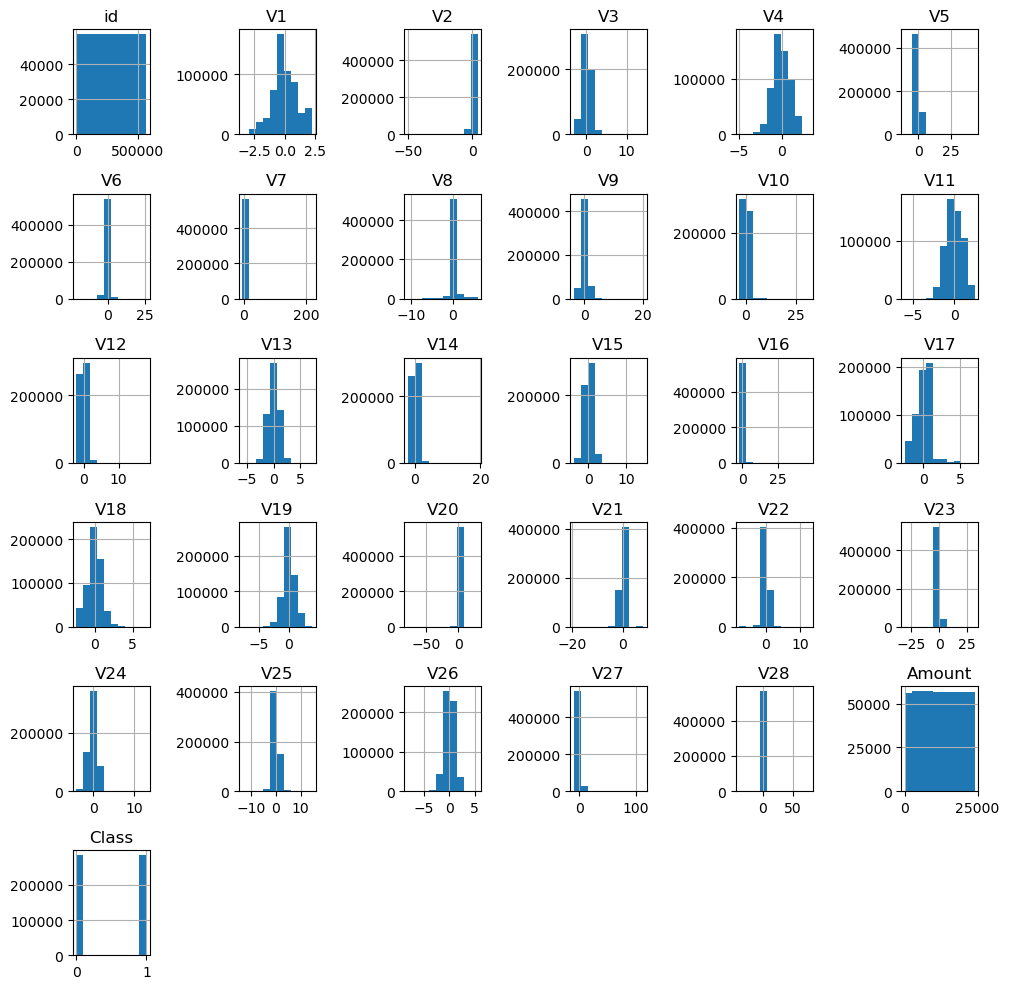

In [242]:
df.hist(figsize=(10, 10))  # Adjust figsize as needed
plt.tight_layout()
plt.show()

<Axes: >

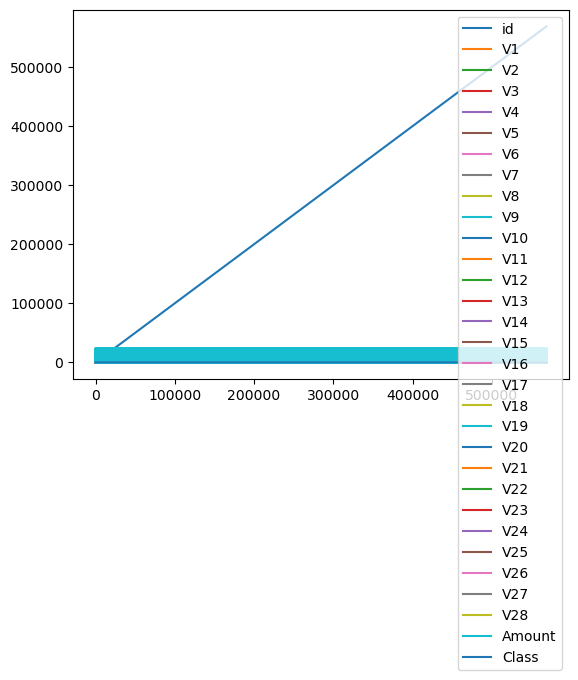

In [179]:
df.plot()

#### Class Imbalance check

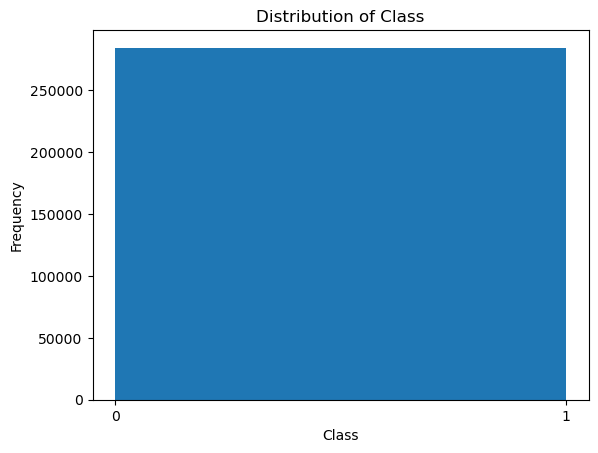

In [243]:
plt.hist(df['Class'], bins=2)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Class')
plt.xticks([0, 1])  # Set x-axis ticks to show 0 and 1
plt.show()

In [244]:
print(df['Class'].value_counts())

0    284315
1    284315
Name: Class, dtype: int64


In [245]:
from imblearn.over_sampling import SMOTE

In [246]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [247]:
print(df['Class'].value_counts())

0    284315
1    284315
Name: Class, dtype: int64


In [248]:
df['Class'].value_counts()

0    284315
1    284315
Name: Class, dtype: int64

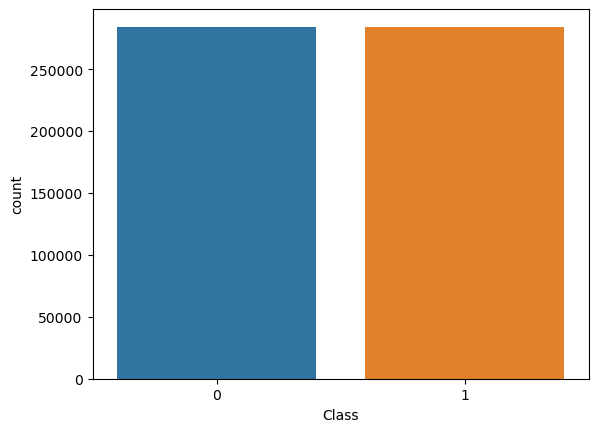

In [249]:
sns.countplot(x='Class', data=df)
plt.show()

In [250]:
descriptive_stats = df.describe()
print(descriptive_stats)

                  id            V1            V2            V3            V4  \
count  568630.000000  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05   
mean   284314.500000 -5.638058e-17 -1.319545e-16 -3.518788e-17 -2.879008e-17   
std    164149.486121  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min         0.000000 -3.495584e+00 -4.996657e+01 -3.183760e+00 -4.951222e+00   
25%    142157.250000 -5.652859e-01 -4.866777e-01 -6.492987e-01 -6.560203e-01   
50%    284314.500000 -9.363846e-02 -1.358939e-01  3.528579e-04 -7.376152e-02   
75%    426471.750000  8.326582e-01  3.435552e-01  6.285380e-01  7.070047e-01   
max    568629.000000  2.229046e+00  4.361865e+00  1.412583e+01  3.201536e+00   

                 V5            V6            V7            V8            V9  \
count  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05   
mean   7.997245e-18 -3.958636e-17 -3.198898e-17  2.109273e-17  3.998623e-17   
std    1.000001e+00  1.000001e+00  1.00000

In [253]:
correlation_matrix = df.corr()
print(correlation_matrix)

              id        V1        V2        V3        V4        V5        V6  \
id      1.000000 -0.395741  0.424267 -0.663655  0.617554 -0.268445 -0.387916   
V1     -0.395741  1.000000 -0.561184  0.484499 -0.498963  0.517462  0.354728   
V2      0.424267 -0.561184  1.000000 -0.627810  0.579638 -0.631669 -0.341040   
V3     -0.663655  0.484499 -0.627810  1.000000 -0.687726  0.510351  0.508974   
V4      0.617554 -0.498963  0.579638 -0.687726  1.000000 -0.429243 -0.474403   
V5     -0.268445  0.517462 -0.631669  0.510351 -0.429243  1.000000  0.245187   
V6     -0.387916  0.354728 -0.341040  0.508974 -0.474403  0.245187  1.000000   
V7     -0.414288  0.573381 -0.694022  0.634336 -0.588648  0.586828  0.418703   
V8      0.121282 -0.226757  0.191321 -0.263018  0.199013 -0.314975 -0.604491   
V9     -0.508427  0.548973 -0.585095  0.648615 -0.676648  0.479614  0.432241   
V10    -0.578014  0.599108 -0.621798  0.707676 -0.712839  0.563874  0.471000   
V11     0.589321 -0.525797  0.558863 -0.

In [254]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import sklearn.linear_model as skl_lm
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score, recall_score, f1_score, roc_auc_score, log_loss

In [255]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pandas as pd

In [256]:
from sklearn.model_selection import train_test_split

In [257]:
X = df.drop('Class', axis=1)  # Features
y = df['Class']  # Target variable

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [259]:
# Use RandomOverSampler to balance the classes in the training set
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

In [260]:
# Count the occurrences of each class in the resampled target variable
class_counts = pd.Series(y_train_resampled).value_counts()
print(class_counts)

1    227565
0    227565
Name: Class, dtype: int64


Having a balanced dataset, where both classes have similar counts, is a significant improvement when dealing with imbalanced classification problems. With this balanced dataset, you can proceed to train machine learning models more effectively as they won't be biased towards the majority class. This should lead to better model performance in predicting both classes accurately.

In [261]:
# Train a Logistic Regression model on the resampled data
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [262]:
df['Class']=df['Class'].map({"M":1, "B":0})
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,NaN
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,NaN
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,NaN
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,NaN
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,NaN


In [263]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

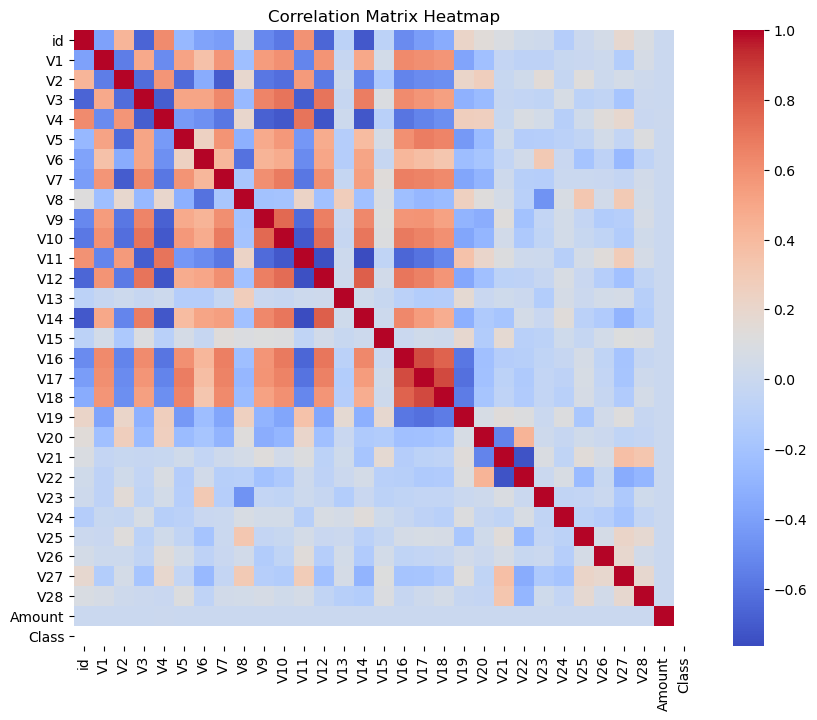

In [264]:
# Plotting the heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

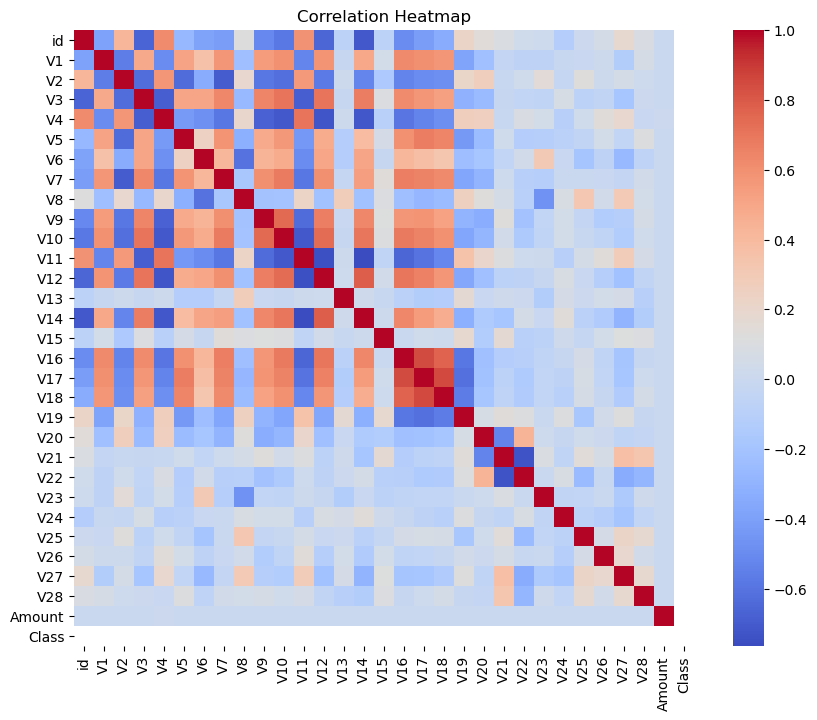

In [265]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')  # Setting annot to False
plt.title('Correlation Heatmap')
plt.show()

In [266]:
# Predict on the test set
y_pred = model.predict(X_test)

In [267]:
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.66      0.76     56750
           1       0.73      0.92      0.81     56976

    accuracy                           0.79    113726
   macro avg       0.81      0.79      0.79    113726
weighted avg       0.81      0.79      0.79    113726



In [268]:
cm=confusion_matrix(y_test,y_pred)

In [269]:
true_positive=cm[1][1]
false_positive=cm[0][1]
true_negative=cm[0][0]
false_negative=cm[1][0]

In [270]:
print(cm)

[[37591 19159]
 [ 4791 52185]]


In [272]:
print("Confusion Matrix:\n", cm, "\n")
print("True Positive:",true_positive )
print("False Positive:",false_positive )
print("True Negative:",true_negative )
print("False Negative:",false_negative )
print("Correct predictions:",round((true_positive + true_negative)/len(y_pred)*100,1),'%' )

Confusion Matrix:
 [[37591 19159]
 [ 4791 52185]] 

True Positive: 52185
False Positive: 19159
True Negative: 37591
False Negative: 4791
Correct predictions: 78.9 %


<Axes: >

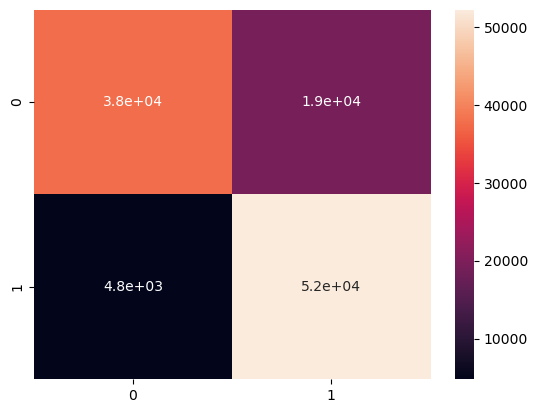

In [273]:
sns.heatmap(cm, annot=True)

In [274]:
y_train.shape

(454904,)

In [275]:
#feature scaling usingStandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_train

array([[ 0.54305281,  0.31213157,  0.25826656, ...,  0.50812951,
         0.86840675, -0.26875907],
       [ 0.85094034, -0.73986278,  0.88554241, ..., -0.13266645,
        -0.95144456,  0.04090277],
       [ 0.76453532, -0.27835988,  0.17629641, ..., -0.09530756,
        -0.96366427, -1.29703047],
       ...,
       [ 0.49656589, -0.98715375, -0.24083186, ...,  2.00990857,
         0.81538095,  0.99732592],
       [-0.92742155,  0.13622656, -0.13014929, ..., -0.37226952,
        -0.57679947, -0.75219215],
       [-0.98814189,  1.01978874, -0.73077178, ..., -0.23609888,
        -0.00709312, -1.45537779]])

#### K-Nearest Neighbors

In [276]:
from sklearn.neighbors import KNeighborsClassifier

In [277]:
#initialize KNNClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print("Test set predictions:{}".format(y_pred))

Test set predictions:[1 1 0 ... 1 1 0]


In [278]:
#Evaluation: accuracy
knn.score(X_test, y_test)

0.9995867259905387

In [279]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [280]:
knn=KNeighborsClassifier(n_neighbors=3)
cv_results=cross_val_score(knn, X, y, cv=5)
print(cv_results)

[0.74782372 0.5671878  0.5823998  0.57082813 0.52800591]


In [281]:
#Evaluation:The average accuracy rate of 5 test-train groups
print("The average accuracy rate is:{}".format(np.mean(cv_results)))

The average accuracy rate is:0.5992490723317447


In [282]:
#from sklearn.model_selection import GridSearchCV
param_grid={'n_neighbors':np.arange(1,50)}
knn=KNeighborsClassifier()
knn_best_k=GridSearchCV(knn, param_grid, cv=5)

In [ ]:
knn_best_k.fit(X,y)
knn_best_k.best_params_
print("Best parameter:",knn_best_k.best_params_)

In [ ]:
#the accuracy rate for the best k
knn_best_k.best_score_

In [ ]:
# Make predictions on the testing set
y_pred = knn_best_k.predict(X_test)
print(classification_report(y_test,y_pred))

Performance Metrics for KNN

In [284]:
#Performance Metrics
cm=confusion_matrix(y_test,y_pred)
true_positive=cm[1][1]
false_positive=cm[0][1]
true_negative=cm[0][0]
false_negative=cm[1][0]

Confusion Matrix:
 [[56708    42]
 [    5 56971]] 

True Positive: 56971
False Positive: 42
True Negative: 56708
False Negative: 5
Correct predictions: 100.0 %


<Axes: >

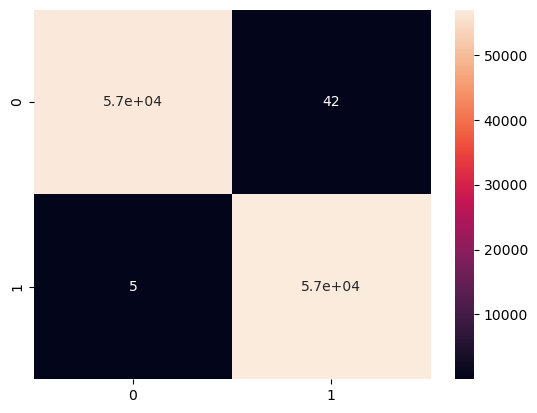

In [285]:
print("Confusion Matrix:\n", cm, "\n")
print("True Positive:",true_positive )
print("False Positive:",false_positive )
print("True Negative:",true_negative )
print("False Negative:",false_negative )
print("Correct predictions:",round((true_positive +
true_negative)/len(y_pred)*100,1),'%' )
#print(cm)
sns.heatmap(cm, annot=True)

Using the k generated from GridSearchCV to find ConfusionMatrix

In [286]:
#cross validation with confusion matrix
from sklearn.metrics import confusion_matrix
knn=KNeighborsClassifier(n_neighbors=14) #use the best k we computed above
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(confusion_matrix(y_test,y_pred))

[[85418    10]
 [  154 85007]]


In [287]:
#Performance Metrics
cm=confusion_matrix(y_test,y_pred)
true_positive=cm[1][1]
false_positive=cm[0][1]
true_negative=cm[0][0]
false_negative=cm[1][0]

Confusion Matrix:
 [[85418    10]
 [  154 85007]] 

True Positive: 85007
False Positive: 10
True Negative: 85418
False Negative: 154
Correct predictions: 99.9 %


<Axes: >

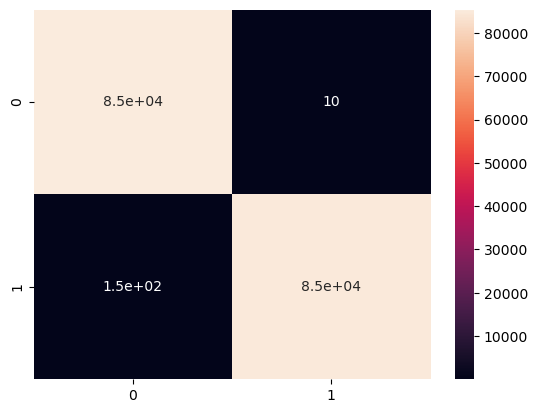

In [288]:
print("Confusion Matrix:\n", cm, "\n")
print("True Positive:",true_positive )
print("False Positive:",false_positive )
print("True Negative:",true_negative )
print("False Negative:",false_negative )
print("Correct predictions:",round((true_positive +
true_negative)/len(y_pred)*100,1),'%' )
#print(cm)
sns.heatmap(cm, annot=True)

### Random Forest

In [339]:
# import packages
import pandas as pd
import numpy as np
# import for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [341]:
#import machine learning

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import sklearn.linear_model as skl_lm
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score, recall_score, f1_score, roc_auc_score, log_loss
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [342]:
# For Random Forests
#from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
# for PCA
from sklearn.decomposition import PCA
#initialize package settings
sns.set(style="whitegrid", color_codes=True,font_scale=1.3)
%matplotlib inline

In [370]:
df2 = pd.read_csv("C:/Users/drdav/OneDrive/Desktop/3rd Semester/ADMN5016 - Sujoy/creditcard_2023.csv", index_col=0)

In [371]:
df2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,,,,,,,,,,,,,,,,,,,,,
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [372]:
df2.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,1.991314e-16,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,-3.163276e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,-5.901008e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,2.626145e-01,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,5.924603e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,3.172271e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [373]:
df2['Class']=df2['Class'].map({"M":1, "B":0})
df2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,,,,,,,,,,,,,,,,,,,,,
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,NaN
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,NaN
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,NaN
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,NaN
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,NaN


In [374]:
median_value = df2['Class'].median()
df2['Class'].fillna(median_value, inplace=True)

In [375]:
X=df2.drop(columns=['Class'],axis=1)
X.shape

(568630, 29)

In [ ]:
y = df2['Class']

In [376]:
X.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
V1,1.000000,-0.561184,0.484499,-0.498963,0.517462,0.354728,0.573381,-0.226757,0.548973,0.599108,...,-0.219164,-0.034669,-0.073729,-0.068917,-0.014651,-0.008508,0.009281,-0.122772,0.070111,-0.001280
V2,-0.561184,1.000000,-0.627810,0.579638,-0.631669,-0.341040,-0.694022,0.191321,-0.585095,-0.621798,...,0.263707,-0.013570,0.035346,0.151906,-0.027515,0.132443,0.012219,0.053835,0.021071,-0.000076
V3,0.484499,-0.627810,1.000000,-0.687726,0.510351,0.508974,0.634336,-0.263018,0.648615,0.707676,...,-0.253805,-0.021710,-0.041970,-0.058884,0.076460,-0.076332,-0.052056,-0.190582,0.005346,-0.002001
V4,-0.498963,0.579638,-0.687726,1.000000,-0.429243,-0.474403,-0.588648,0.199013,-0.676648,-0.712839,...,0.257236,-0.013093,0.091197,0.043266,-0.102508,0.029402,0.136679,0.188036,-0.011316,0.001859
V5,0.517462,-0.631669,0.510351,-0.429243,1.000000,0.245187,0.586828,-0.314975,0.479614,0.563874,...,-0.246694,0.034147,-0.119152,-0.113919,-0.083243,-0.047845,0.047771,-0.043759,0.108422,-0.000016
V6,0.354728,-0.341040,0.508974,-0.474403,0.245187,1.000000,0.418703,-0.604491,0.432241,0.471000,...,-0.188360,-0.040153,0.036896,0.308598,-0.005237,-0.195340,-0.067605,-0.260783,-0.065641,0.000734
V7,0.573381,-0.694022,0.634336,-0.588648,0.586828,0.418703,1.000000,-0.180986,0.601789,0.678004,...,-0.299436,0.019627,-0.104043,-0.111177,-0.004152,0.000802,-0.006488,-0.036557,0.040732,0.001326
V8,-0.226757,0.191321,-0.263018,0.199013,-0.314975,-0.604491,-0.180986,1.000000,-0.208557,-0.199995,...,0.131354,0.056416,-0.098752,-0.463649,0.083272,0.322639,0.040448,0.298398,0.046017,-0.000208
V9,0.548973,-0.585095,0.648615,-0.676648,0.479614,0.432241,0.601789,-0.208557,1.000000,0.748487,...,-0.328975,0.131001,-0.204723,-0.042371,0.044006,-0.034885,-0.131000,-0.111842,0.069959,-0.001589
V10,0.599108,-0.621798,0.707676,-0.712839,0.563874,0.471000,0.678004,-0.199995,0.748487,1.000000,...,-0.287051,0.037426,-0.150957,-0.056285,0.045935,-0.014045,-0.053684,-0.134907,0.035646,-0.001259


In [377]:
X.shape

(568630, 29)

In [159]:
X.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,-5.086602e-02,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,4.654551e-16,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,2.506675e-16,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,-9.316409e-16,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.857247e-16,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.554057e-16,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,-1.858755e-16,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,9.379684e-16,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,2.033737e-16,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,-2.343720e-16,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246


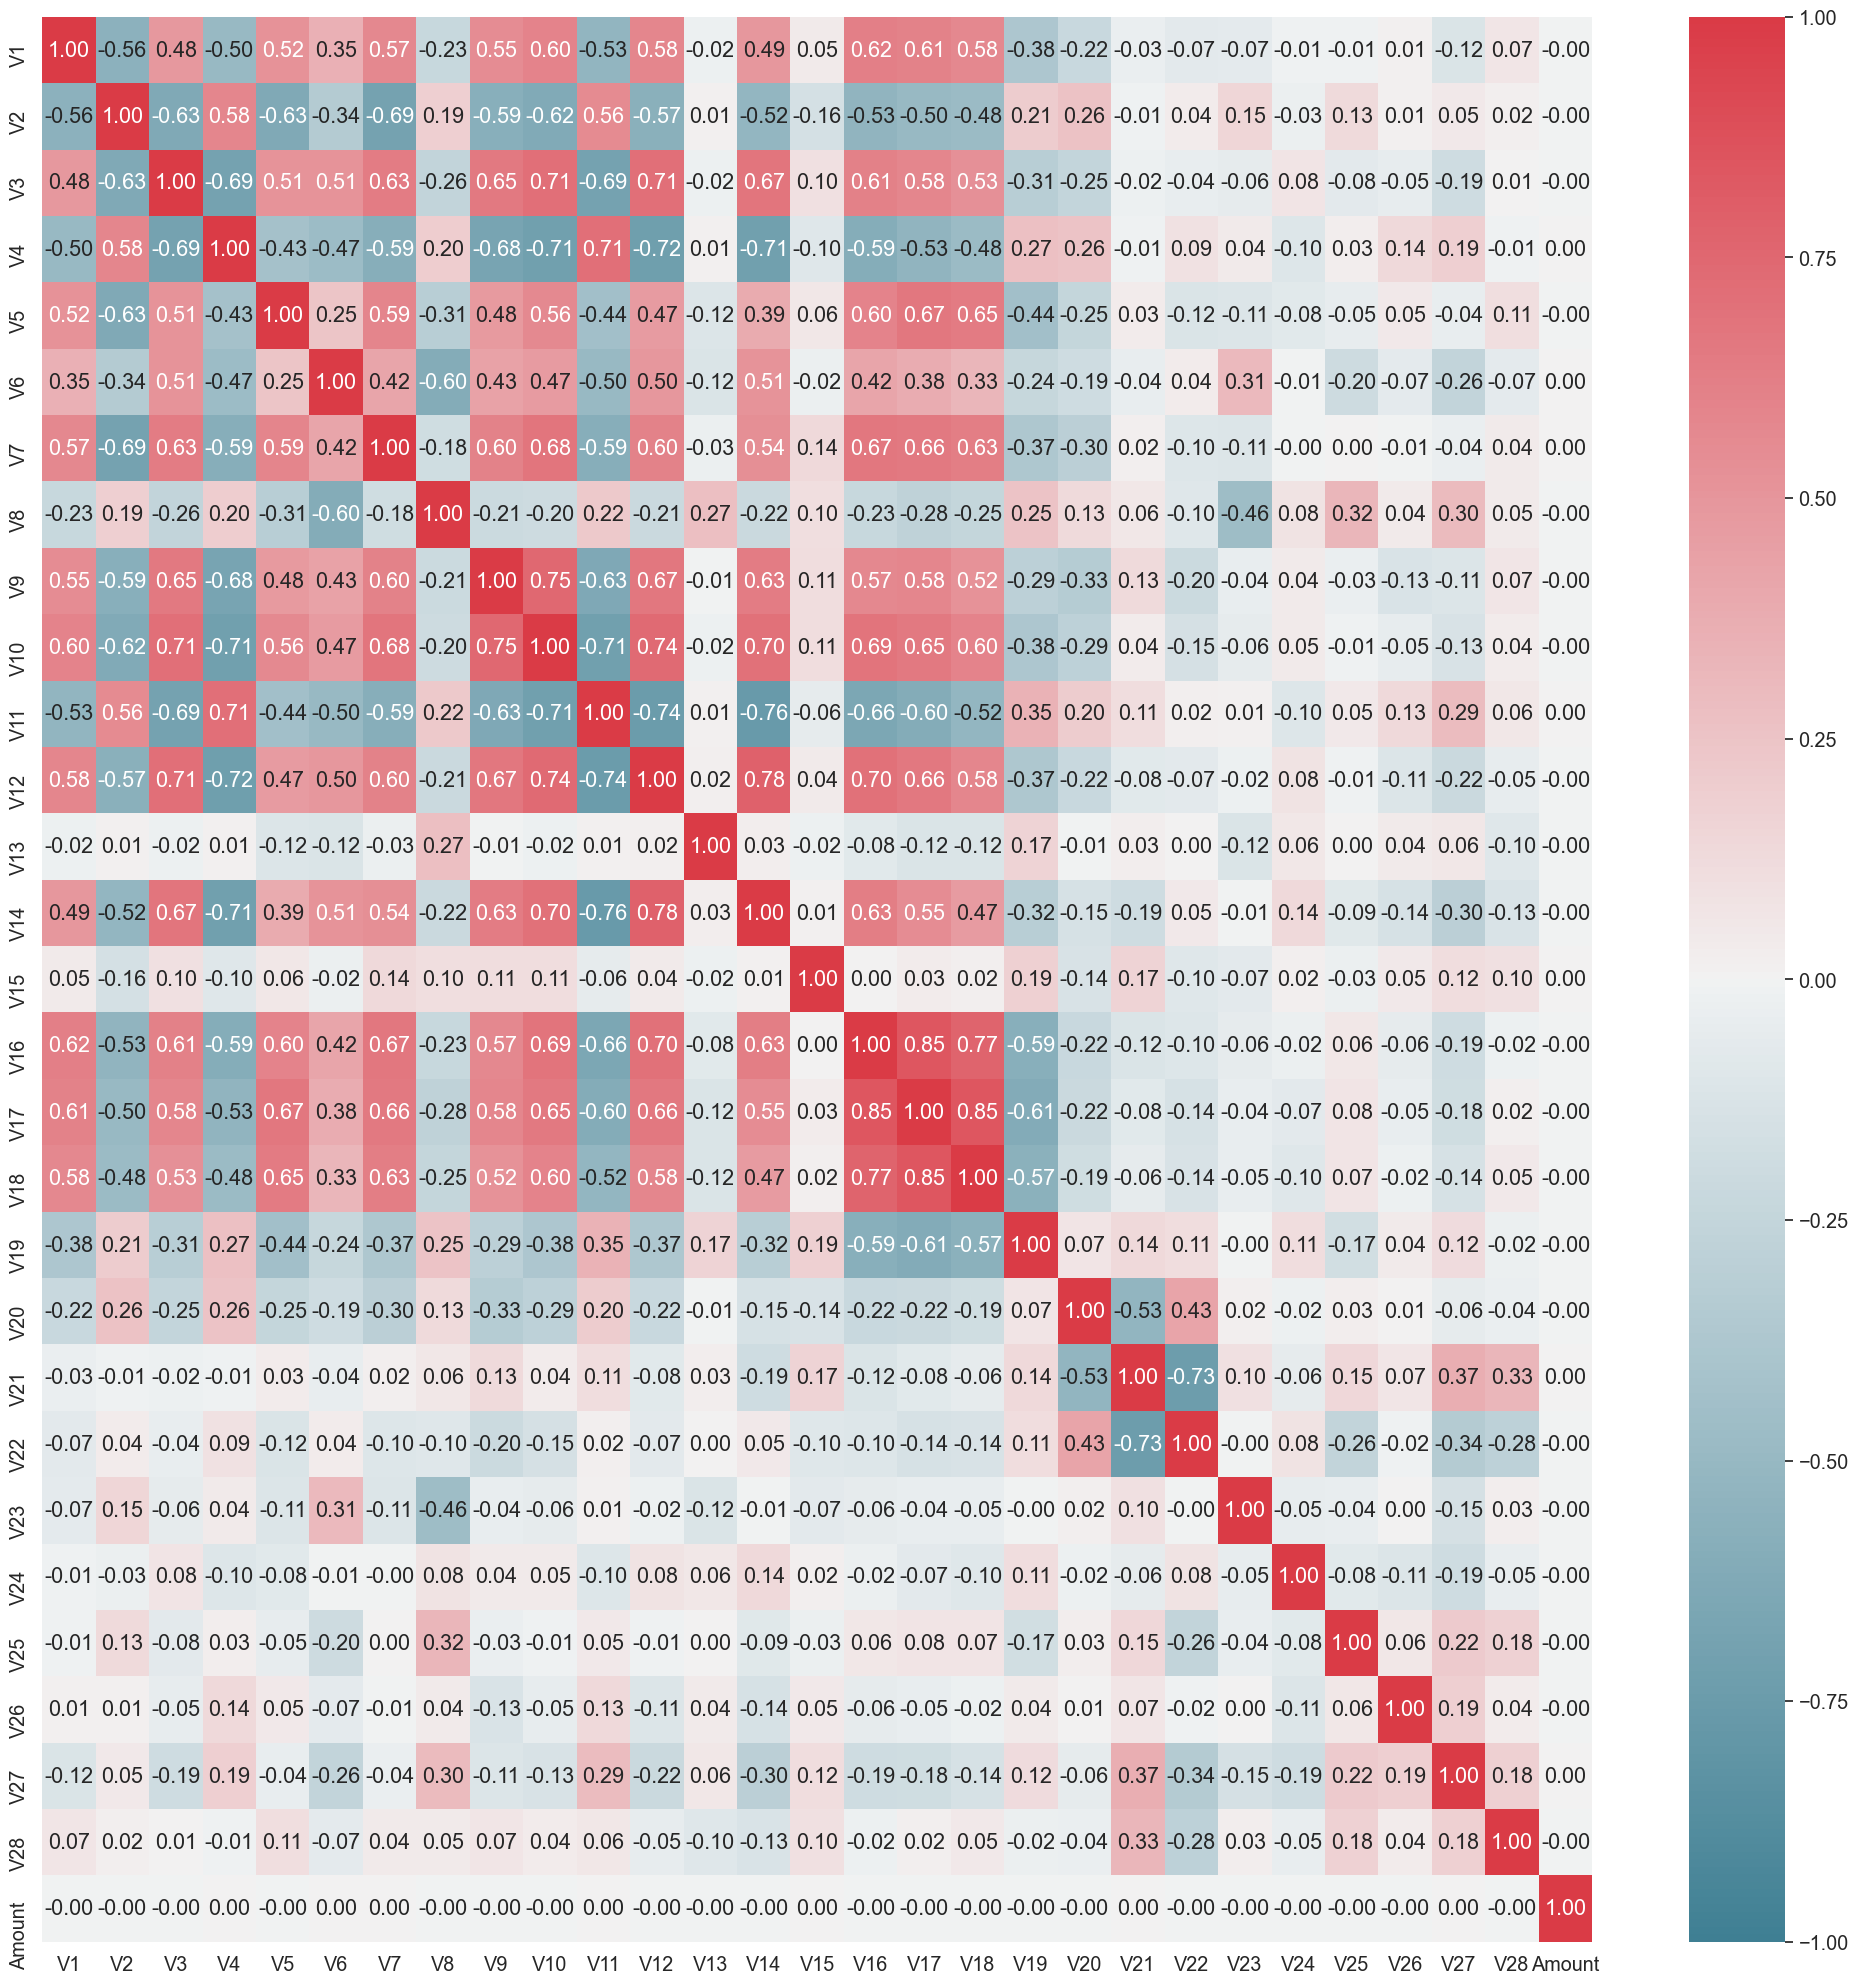

In [378]:
plt.figure(figsize=(25,25))
corr = X.corr()
cmap=sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap,vmin=-1,vmax=1, center=0,
fmt='.2f')
plt.show()

In [379]:
corr_matrix = X.corr().abs()

In [380]:
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)
to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.90)]
X = X.drop(to_drop, axis = 1)
print(f"The reduced dataframe has {X.shape[1]} columns.")

The reduced dataframe has 29 columns.


In [381]:
X.shape

(568630, 29)

In [382]:
sc=StandardScaler()
X_standardise=sc.fit_transform(X)
X_standardise

array([[-0.2606478 , -0.46964845,  2.49626608, ..., -0.08123011,
        -0.15104549,  0.85844694],
       [ 0.98509973, -0.35604509,  0.55805635, ..., -0.24805206,
        -0.06451192, -0.79636931],
       [-0.26027161, -0.94938461,  1.72853778, ..., -0.30025804,
        -0.24471823, -1.37701093],
       ...,
       [-0.31199739, -0.00409479,  0.13752559, ..., -0.48753975,
        -0.26874127,  1.66640101],
       [ 0.63687054, -0.51696952, -0.30088853, ..., -0.15926926,
        -0.07625057, -0.27185346],
       [-0.79514417,  0.43323608, -0.64914005, ..., -1.5751126 ,
         0.7229365 ,  1.3659619 ]])

In [383]:
pca=PCA(n_components=4)
result = pca.fit(X_standardise)
pca_results = result.transform(X_standardise)
pca_df = pd.DataFrame(data = pca_results)
pca_df

,0,1,2,3
0,2.190569,-0.163905,0.263719,0.911382
1,2.085245,0.354879,0.169319,0.019555
2,2.283197,-0.522190,-0.360617,0.379835
3,2.694944,0.107699,-0.255305,-1.141541
4,2.048884,-0.354086,0.936877,0.978982
...,...,...,...,...
568625,-4.169072,1.382823,-1.497054,0.746622
568626,-0.744048,0.385685,-0.382337,0.564945
568627,-0.698403,-0.319685,-0.269184,-0.138539
568628,1.358058,0.230192,0.270385,-0.505600


In [384]:
feature_importance = pd.DataFrame(pca.components_.T, index=X.columns)
feature_importance

,0,1,2,3
V1,0.230353,0.035374,0.024543,-0.087199
V2,-0.234129,-0.048452,-0.117667,-0.093514
V3,0.258935,-0.018019,0.057196,0.128719
V4,-0.253161,0.002903,-0.087634,-0.181302
V5,0.222799,0.093726,-0.049513,-0.183582
V6,0.187259,-0.158630,-0.307586,0.199203
V7,0.254266,0.084299,0.067083,-0.025747
V8,-0.113509,0.200938,0.528603,-0.067623
V9,0.252209,0.086249,0.034293,0.153824
V10,0.275169,0.051686,0.065670,0.075311


In [385]:
print(pca.explained_variance_ratio_)
total_var = pca.explained_variance_ratio_.sum() * 100
total_var

[0.33872158 0.09688717 0.06618987 0.06346588]


56.526450474348735

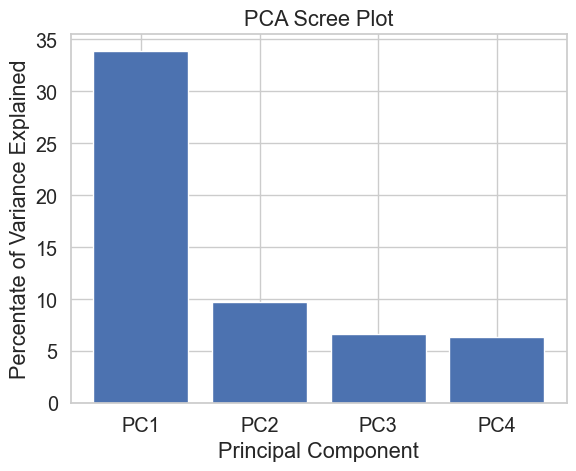

In [386]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4']
plt.bar(x= range(1,5), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

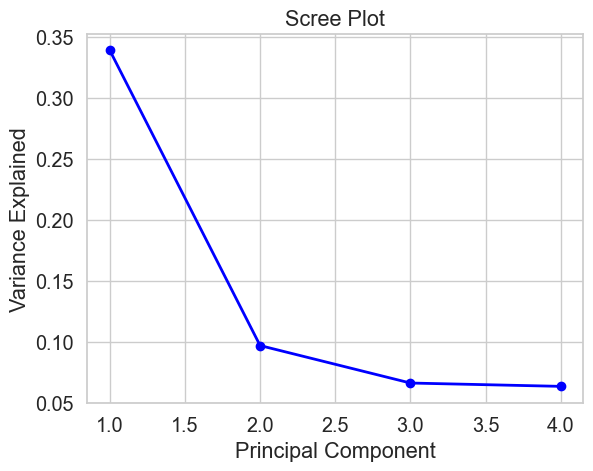

In [387]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [393]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25)

In [389]:
import pandas as pd

In [391]:
median_value = df2['Class'].median()
df2['Class'].fillna(median_value, inplace=True)

In [ ]:
# Create a LR classifier
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [394]:
plt.figure(figsize=(10,8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [395]:
df_diagnosis=df['Class'].value_counts()

In [396]:
corr = X.corr()

In [164]:
cmap=sns.diverging_palette(220,10, as_cmap=True)

<Axes: >

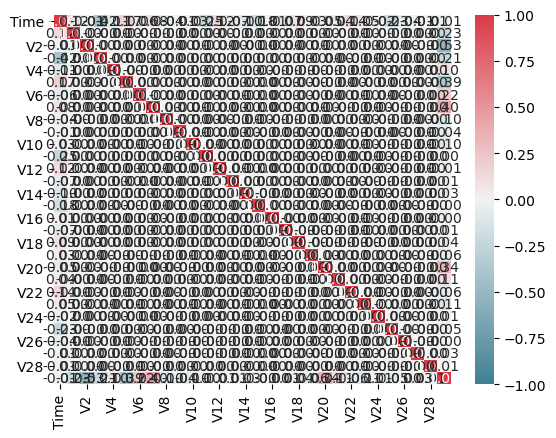

In [165]:
sns.heatmap(corr, annot=True, cmap=cmap,vmin=-1,vmax=1, center=0, fmt='.2f')

In [106]:
plt.show()

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
y_train.shape

(227845,)

In [108]:
mmsc=MinMaxScaler()

In [109]:
X_train=mmsc.fit_transform(X_train)

In [110]:
X_test=mmsc.transform(X_test)

In [111]:
X_train

array([[8.29621742e-01, 9.91507503e-01, 7.63240547e-01, ...,
        2.39485060e-01, 3.12167152e-01, 3.88849706e-04],
       [6.78115885e-01, 9.51481705e-01, 7.60643195e-01, ...,
        2.29471505e-01, 3.10185596e-01, 1.78660676e-03],
       [8.65578268e-01, 9.59525616e-01, 7.75916548e-01, ...,
        2.43369343e-01, 3.14550220e-01, 4.66697494e-04],
       ...,
       [4.61798000e-01, 9.55803074e-01, 7.77735416e-01, ...,
        2.35478371e-01, 3.09142458e-01, 1.53360144e-04],
       [5.08883513e-01, 9.08200066e-01, 7.92105507e-01, ...,
        2.50368503e-01, 3.19938719e-01, 3.89238944e-05],
       [4.42040141e-01, 9.79243884e-01, 7.58977035e-01, ...,
        2.38426174e-01, 3.13906932e-01, 4.39840007e-03]])

In [112]:
from sklearn.svm import SVC

In [113]:
svc_model=SVC()

In [114]:
svc_model.fit(X_train, y_train)

SVC()

In [115]:
y_pred = svc_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.80      0.80        98

    accuracy                           1.00     56962
   macro avg       0.91      0.90      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [116]:
cm=confusion_matrix(y_test,y_pred)

In [117]:
print(cm)

[[56846    18]
 [   20    78]]


In [118]:
true_positive=cm[1][1]
false_positive=cm[0][1]
true_negative=cm[0][0]
false_negative=cm[1][0]

In [119]:
print("Confusion Matrix:\n", cm, "\n")
print("True Positive:",true_positive )
print("False Positive:",false_positive )
print("True Negative:",true_negative )
print("False Negative:",false_negative )
print("Correct predictions:",round((true_positive + true_negative)/len(y_pred)*100,1),'%' )

Confusion Matrix:
 [[56846    18]
 [   20    78]] 

True Positive: 78
False Positive: 18
True Negative: 56846
False Negative: 20
Correct predictions: 99.9 %


<Axes: >

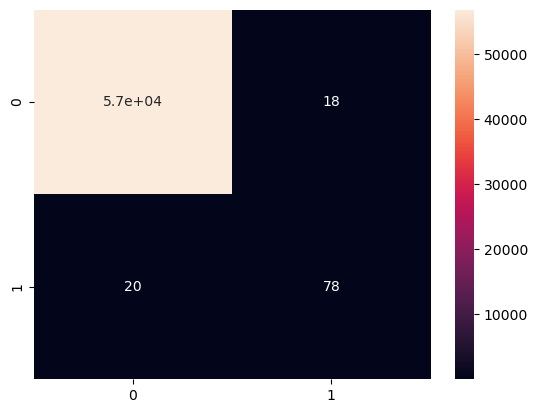

In [120]:
sns.heatmap(cm, annot=True)

In [121]:
from sklearn.model_selection import GridSearchCV

In [122]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.001], 'kernel':['rbf']}

In [123]:
grid = GridSearchCV(SVC(),param_grid,verbose = 4)

In [124]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.999 total time=   6.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.999 total time=   5.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.999 total time=   5.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.999 total time=   6.6s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.999 total time=   6.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.999 total time=   7.4s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.999 total time=   6.5s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.999 total time=   6.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.999 total time=   6.3s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.999 total time=   6.2s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.998 total time=   6.8s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.001],
                         'kernel': ['rbf']},
             verbose=4)

In [125]:
grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [126]:
grid.best_estimator_

SVC(C=100, gamma=1)

In [127]:
grid_predictions = grid.predict(X_test)

In [128]:
cmG = confusion_matrix(y_test,grid_predictions)

<Axes: >

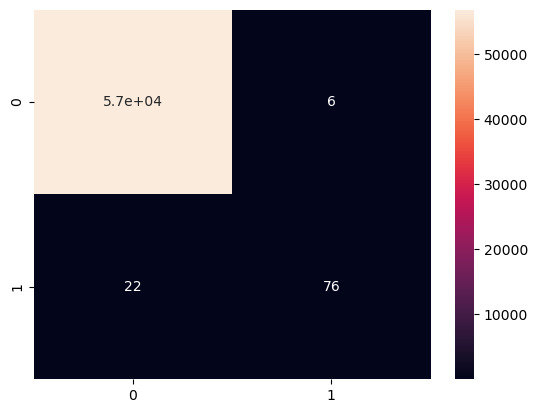

In [129]:
sns.heatmap(cmG, annot=True)

In [130]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.78      0.84        98

    accuracy                           1.00     56962
   macro avg       0.96      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [44]:
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Transformed_V1'],
      dtype='object')


In [40]:
df[columns_to_transform] = df[columns_to_transform].apply(lambda x: np.log(x + 1))

C:\Users\drdav\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [39]:
df['Transformed_V1'] = np.log(df['V1'] + 1)

C:\Users\drdav\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
